In [9]:
import random
import matplotlib.pyplot as plt

import torch

In [10]:
# Show all available GPUs
# print(torch.cuda.get_device_name(0))

# Set device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

print('=======================\n')
GPU = False
# Set default tensor type to cuda.FloatTensor if GPU is available
if torch.cuda.is_available() and GPU:
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    torch.set_default_device(device)
    torch.set_default_dtype(torch.float32)
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print(f"Dtype: {torch.get_default_dtype()}")
    print(f"Device: {torch.cuda.current_device()}")
else:
    torch.set_default_tensor_type(torch.FloatTensor)
    device = torch.device("cpu")
    torch.set_default_device(device)
    print("Using CPU")


# Set seed for reproducibility
torch.manual_seed(0)

cpu

Using CPU


In [11]:
import classes
import systems

# Reload modules
import importlib
importlib.reload(classes)
importlib.reload(systems)

# Local imports modules
from classes import PID
from systems import Trolley, TankHeating

# Trolley simulation

In [12]:
DT = torch.tensor(0.01)
TIME = torch.arange(0, 300, DT)
DISTURBANCE = torch.zeros_like(TIME)
TARGET = torch.ones_like(TIME) * 10
TARGET[TIME > 70] = 20
TARGET[TIME > 140] = 0
TARGET[TIME > 230] = 10

# Create a system
MASS = torch.tensor(2)
SPRING = torch.tensor(1)
FRICTION = torch.tensor(0.4)
system = Trolley(MASS, SPRING, FRICTION, DT)

PID setting

In [13]:
# Create a PID controller
KP = torch.tensor(0.7)
KI = torch.tensor(0.1)
KD = torch.tensor(0.1)
pid = PID(KP, KI, KD)
pid.set_limits(
    torch.tensor(20.),
    torch.tensor(-20.),
)

data storage

In [14]:
# Loss
feedback_Loss = torch.zeros(len(TIME))
feedback_E = torch.zeros(len(TIME))

# Gains
feedback_Kp = torch.zeros(len(TIME))
feedback_Ki = torch.zeros(len(TIME))
feedback_Kd = torch.zeros(len(TIME))

# Systema
feedback_Y = torch.zeros(len(TIME))
feedback_U = torch.zeros(len(TIME))

### Run the simulation

* Y - actual position
* W - target position
* E - error
* D - disturbance
* U - applyed control

In [15]:
def run():
    for i in range(len(TIME)):
        W = TARGET[i]
        D = DISTURBANCE[i]
        Y = system.get_position()
        E = W - Y
        U = pid.compute(E, DT)
        
        # Store values
        feedback_Y[i] = Y
        feedback_U[i] = U
        feedback_E[i] = E

        # Apply control signal to the system
        system.apply_control(U, D)

run()

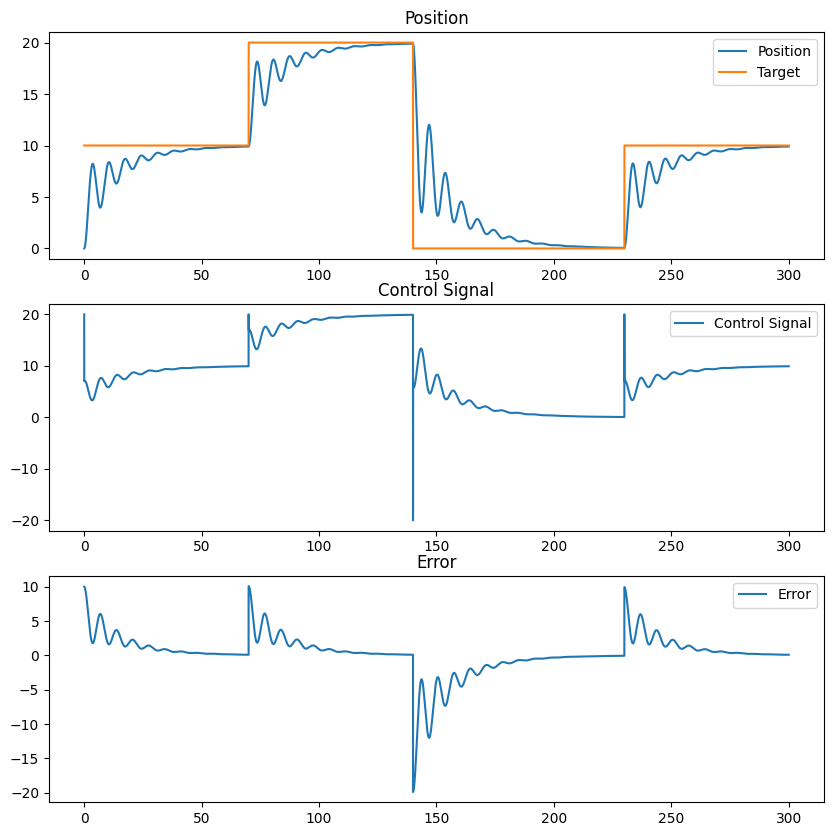

In [16]:
def plot():
    fig, axs = plt.subplots(3, 1, figsize=(10, 10))
    axs[0].plot(TIME, feedback_Y, label='Position')
    axs[0].plot(TIME, TARGET, label='Target')
    axs[0].set_title('Position')
    axs[0].legend()

    axs[1].plot(TIME, feedback_U, label='Control Signal')
    axs[1].set_title('Control Signal')
    axs[1].legend()

    axs[2].plot(TIME, feedback_E, label='Error')
    axs[2].set_title('Error')
    axs[2].legend()

    plt.show()

plot()